In [89]:
missing_modules = """
  Uncomment the lines in the next cell and execute them to install a new conda environment and
  a Jupyter kernel. After the kernel is created, refresh the webpage.
  Then, you should see jhub_tensorflow kernel, in the `Kernel/Change kernel` menu on top."""
try:
    import tensorflow as tf
except:
    print('Tensorflow is not installed:', missing_modules)
try:
    import pandas as pd
except:
    print('Pandas is not installed:', missing_modules)
try:
    import matplotlib
except:
    print('Matplotlib is not installed:', missing_modules)

Matplotlib is not insalled: 
          Uncomment the lines in the next cell and execute them to install a new conda environment and
          a jupyter kernel. After the kernel is created, refresh the page or close and open the notebook again.
          Then, you should see jhub_tensorflow kernel, in the Kernel/Change kernel menu on top.


In [5]:
## Step 1
## Create a new conda environment
#!conda create -y -n jhub_tensorflow

## Step 2
## After activating the environment, install the modules tou want.
## You need to install jupyter nb_conda ipykernel modules as well.
## This part can take a long time, take a coffee break
#!source activate jhub_tensorflow; conda install -y jupyter nb_conda ipykernel tensorflow matplotlib pandas

## Step 3
## Install Jupyter kernel
#!source activate jhub_tensorflow; python -m ipykernel install --user --name jhub_tensorflow

## You can repeat Step 2, whenever you need to install a new module to the same kernel.
##!source activate jhub_tensorflow; conda install -y newmodule
## You can omit jupyter, nb_conda, ipykernel as you have already installed.

Solving environment: done

## Package Plan ##

  environment location: /home/keceli/.conda/envs/jhub_tensorflow

  added / updated specs:
    - ipykernel
    - jupyter
    - nb_conda
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |             main           3 KB
    absl-py-0.7.1              |           py36_0         157 KB
    c-ares-1.15.0              |       h7b6447c_1          98 KB
    grpcio-1.14.1              |   py36h9ba97e2_0         1.0 MB
    icc_rt-2019.4              |        intel_243         9.0 MB  intel
    intel-openmp-2019.4        |        intel_243         870 KB  intel
    keras-applications-1.0.8   |             py_0          33 KB
    keras-preprocessing-1.1.0  |             py_1          36 KB
    libgcc-ng-9.1.0            |       hdf63c60_0         8.1 MB
    libprotobuf-3.8.0          |       hd408876_0      

In [86]:
# A simple test based on the Tensorflow tutorial: https://www.tensorflow.org/tutorials
# Run a single epoch for mnist, should take about 10 seconds.

import tensorflow as tf
import time
import numpy as np
import sys
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(32, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
start = time.time()
model.fit(x_train, y_train, epochs=1)
runtime = time.time() - start
loss, acc = model.evaluate(x_test, y_test)

# Record the versions, runtime and model metrics into a csv file.
record = f'{datetime.datetime.now()},{sys.version.split()[0]},{tf.__version__},{np.__version__},{loss:3f},{acc:.3f},{runtime:.3f}\n'
csvfile = '/lus/theta-fs0/projects/datascience/jupyterhub/tensorflow.csv'
with open(csvfile, 'a') as f:
        f.write(record)

# Read csv file into a Pandas dataframe and print min,max, mean and standard deviation values.
import pandas as pd
df = pd.read_csv(csvfile)
df.describe()

,Loss,Accuracy,Time
count,5.000000,5.000000,5.000000
mean,0.225357,0.934400,9.307800
std,0.005575,0.001673,0.639436
min,0.215710,0.933000,8.394000
25%,0.225936,0.933000,9.179000
50%,0.226852,0.934000,9.202000
75%,0.229013,0.935000,9.644000
max,0.229273,0.937000,10.120000


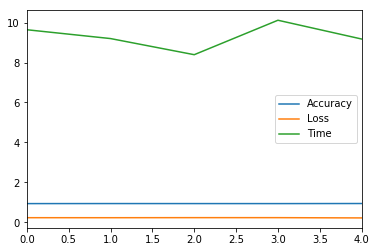

In [93]:
# A simple plot of accuracy, loss, and runtime.
%matplotlib inline
df.Accuracy.plot(label='Accuracy')
df.Loss.plot()
ax = df.Time.plot()
ax.legend()